In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#sredjujem dataset isto kao i za kmeans bez atributa Region
data=pd.read_csv("C:/Users/Administrator/2023_Data_Mining_Coffee_Quality_Dataset/cleaned_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
X=data.drop(["Total.Cup.Points","Region"],axis=1)
feature_names=X.columns

In [3]:
hotencoder=OneHotEncoder(feature_name_combiner="concat")
encoder_df=pd.DataFrame(hotencoder.fit_transform(X[["Country.of.Origin","Variety","Processing.Method","Color"]]).toarray(),columns=hotencoder.get_feature_names_out())


In [4]:
X=X.join(encoder_df)
X.drop(labels=["Country.of.Origin","Variety","Processing.Method","Color"],axis=1,inplace=True)
feature_names=X.columns

In [5]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=feature_names)

In [6]:
pca=PCA()
X=pd.DataFrame(pca.fit_transform(X))

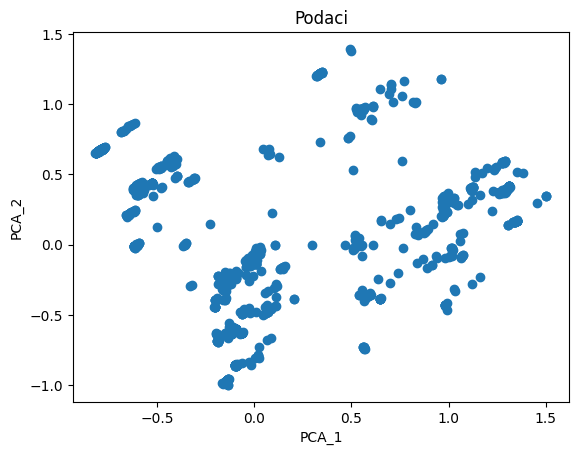

In [8]:
plt.figure()
plt.scatter(X[0],X[1])
plt.title("Podaci")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

In [24]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1,min_samples=3)
dbscan.fit(X[[0,1]])

DBSCAN(eps=0.1, min_samples=3)

In [25]:
dbscan.labels_

array([0, 1, 2, ..., 3, 3, 3], dtype=int64)

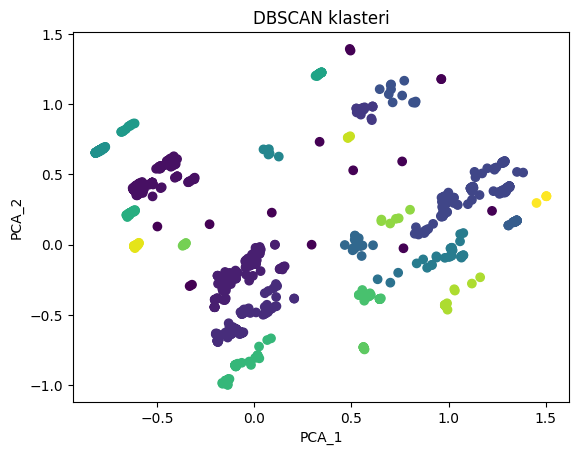

In [26]:
#vizuelizacija
X['DBSCAN_labels']=dbscan.labels_ 
plt.figure()
plt.scatter(X[0],X[1],c=X['DBSCAN_labels'])
plt.title('DBSCAN klasteri')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()


In [76]:
#optimalna vrednost za epsilon 
#kalkulisemo prosecnu vrednost najblizih k suseda svake tacke
#broj suseda stavljamo na minPts
from sklearn.neighbors import NearestNeighbors
nn= NearestNeighbors(n_neighbors=3)
nbrs = nn.fit(X[[0,1]])
distances, indices = nbrs.kneighbors(X[[0,1]])

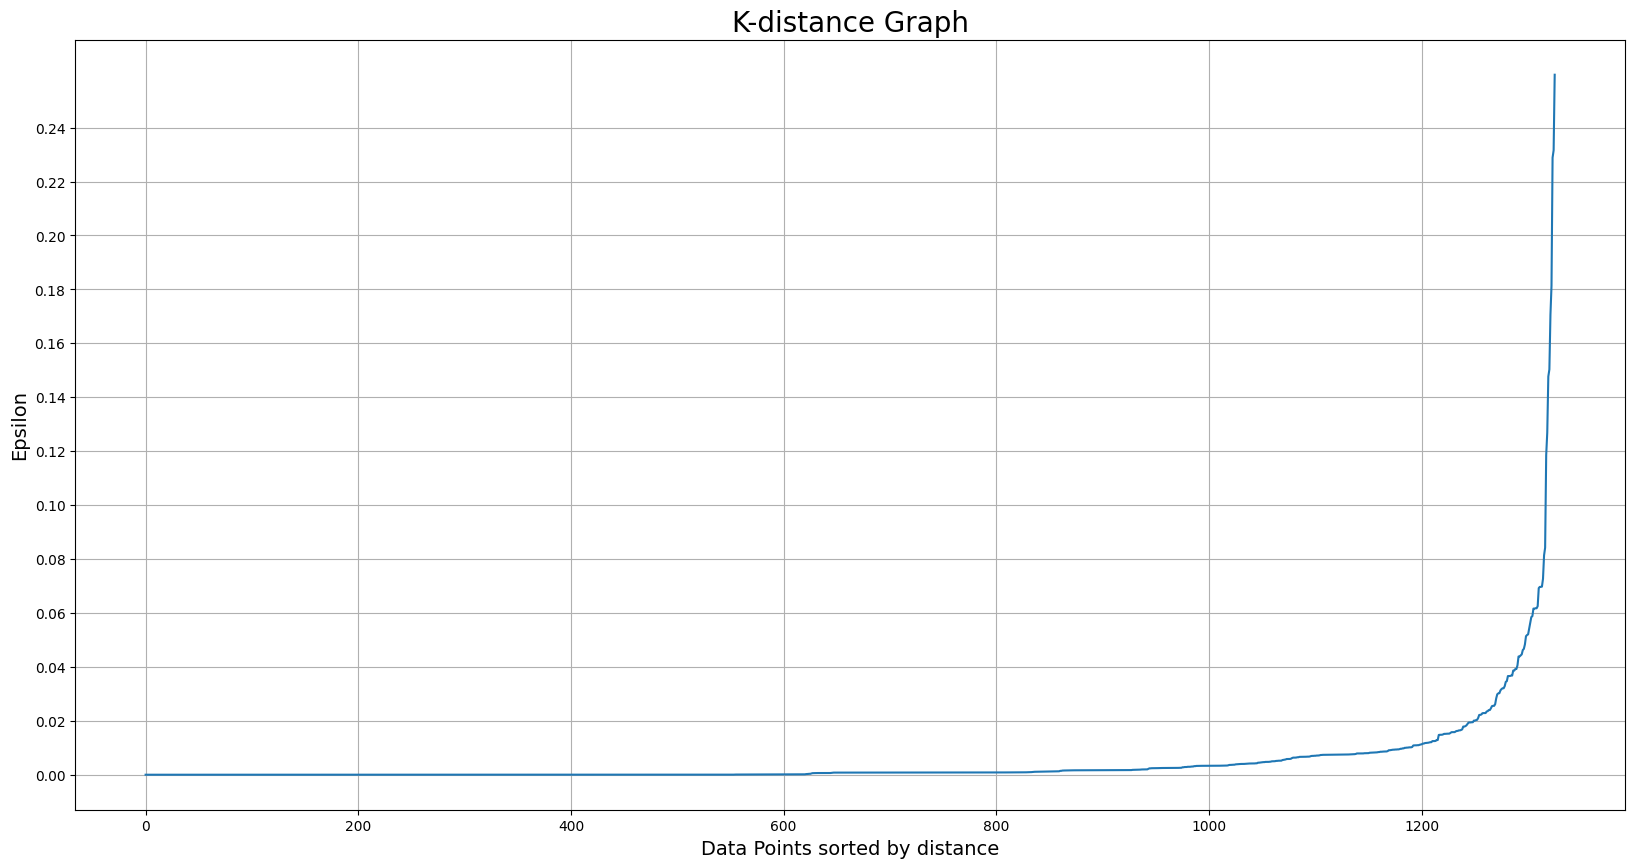

In [77]:
#Abhishek Sharma - Analytics Vidhya
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.yticks(np.arange(0.0,0.25,0.02))
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

In [78]:
#Optimalno oko 0.03

In [79]:
dbscan=DBSCAN(eps=0.03,min_samples=3)
dbscan.fit(X[[0,1]])


DBSCAN(eps=0.03, min_samples=3)

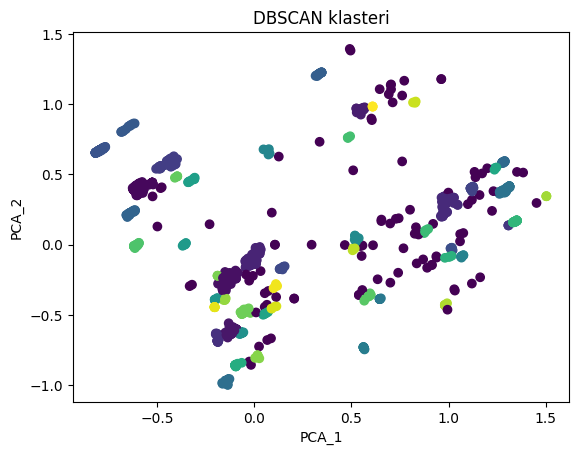

In [80]:
#vizuelizacija
X['DBSCAN_labels']=dbscan.labels_ 
plt.figure()
plt.scatter(X[0],X[1],c=X['DBSCAN_labels'])
plt.title('DBSCAN klasteri')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

In [81]:
from sklearn import metrics
metrics.silhouette_score(X, X['DBSCAN_labels'])

0.5901252161926618

In [ ]:
#Na osnovu koeficijenta senke mozemo zakljuciti da nemamo preklapajuce klastere ili pogresno grupisane podatke